<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Different-Prior-distribution-vs-Different-number-of-experiments" data-toc-modified-id="Different-Prior-distribution-vs-Different-number-of-experiments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Different Prior distribution vs Different number of experiments</a></span></li><li><span><a href="#Grid-search-method-for-basic-coin-tosses-problem" data-toc-modified-id="Grid-search-method-for-basic-coin-tosses-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Grid search method for basic coin tosses problem</a></span></li></ul></div>

In [4]:
%matplotlib inline
     
from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Different Prior distribution vs Different number of experiments
- Prior can have very different effect if number of experiments are low
- If a lot exp, then prior don't really matter

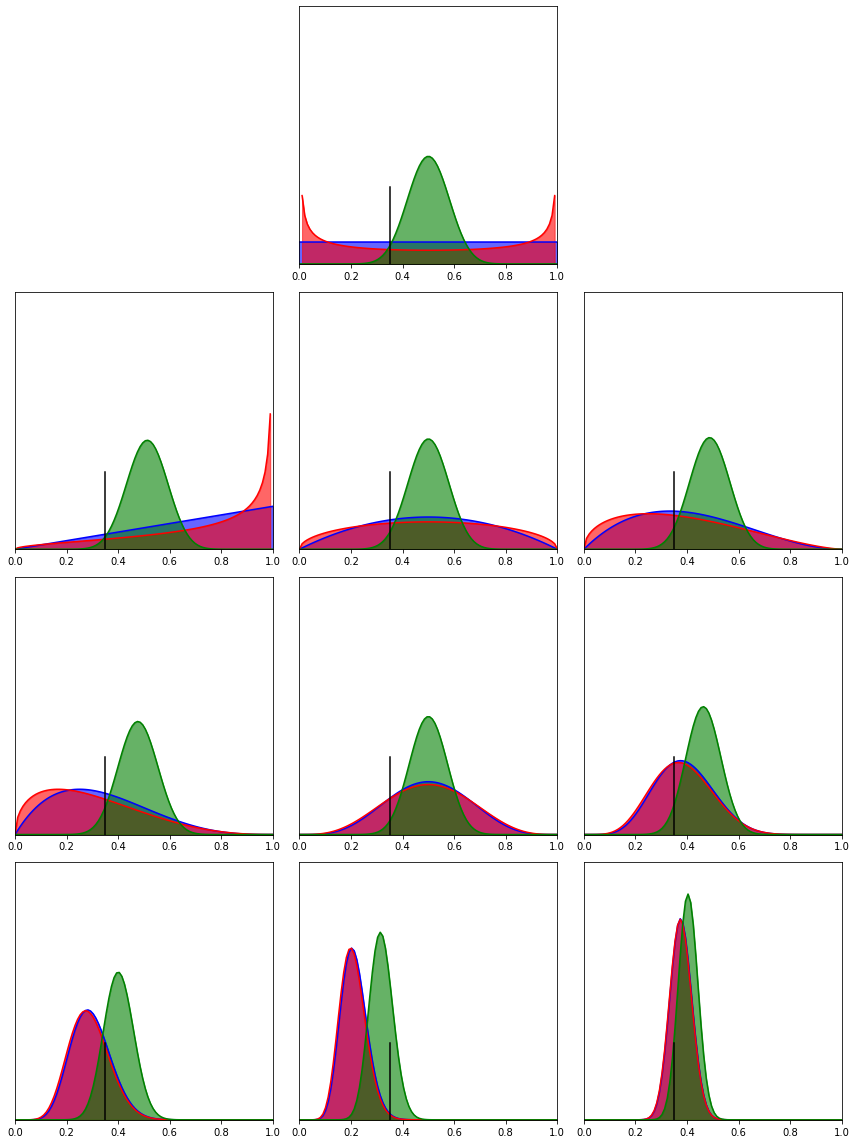

In [14]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 64, 128]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x=np.linspace(0, 1, 100)
plt.figure(figsize=(12, 16))

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()


## Grid search method for basic coin tosses problem


In [27]:
def posterior_grid(grid_points=100, heads=6, tosses=9):
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1, grid_points)  # this is just uniform distribution prior
    
    # pdf is for continuous dist, pmf for discontinous
    likelihood = stats.binom.pmf(heads, tosses, grid)  # binomial distribution and based on prior
    
    unstd_posterior = likelihood * prior  # posterior
    posterior = unstd_posterior / unstd_posterior.sum()  # normalize posterior
    return grid, posterior

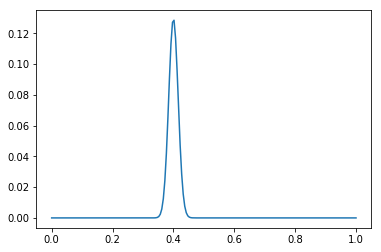

In [36]:
points = 200
h, n = 400, 1000
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior)